# Import Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import pickle

# Data Collection and Processing

In [67]:
# Load the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r"C:\Users\Chaitanya\Data Science and AI\Data Science Projects\Gold price prediction model using ML\Dataset file\gld_price_data.csv")

In [69]:
# print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [71]:
# print the last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [73]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [75]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [77]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [79]:
# getting the stastical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation

In [82]:
gold_data = gold_data.drop('Date',axis=1)
correlation = gold_data.corr()

<Axes: >

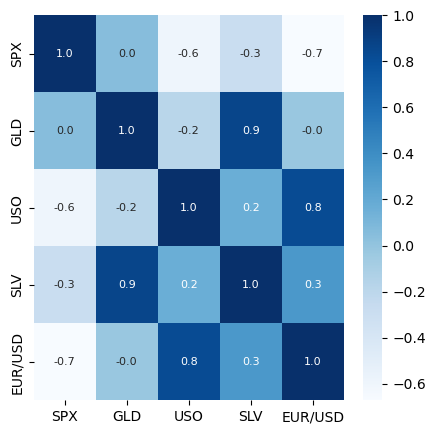

In [84]:
# construction the heatmap to understand the correlation
plt.figure(figsize = (5,5))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [85]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

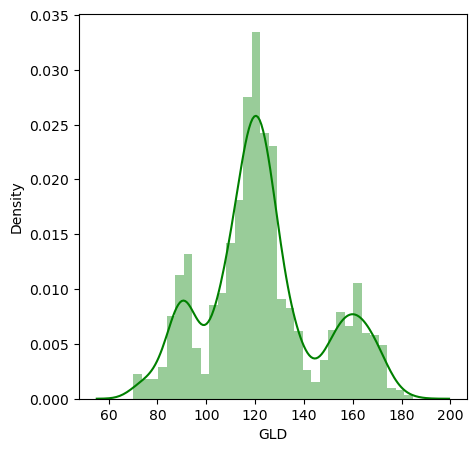

In [88]:
# Check the distribution of the GLD price
plt.figure(figsize = (5,5))
sns.distplot(gold_data['GLD'],color='green')

# Splitting the Features and Target

In [91]:
X = gold_data.drop(['GLD'],axis=1)
y = gold_data['GLD']

In [93]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [95]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into training data and testing data

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2
                                                   )

# Model Training

In [101]:
regressor = RandomForestRegressor(n_estimators=100)

In [103]:
# training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

# Model Evaluation

In [105]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [106]:
print(test_data_prediction)

[168.6794991   82.05729986 116.18670035 127.89100093 120.70740114
 154.76709762 150.12009851 126.11140037 117.51579879 126.04740084
 116.66320098 172.38660051 141.63359856 167.7361984  115.1468001
 117.23310035 137.32780397 169.92560109 159.31360302 156.97779881
 155.05719981 124.74050056 176.21949995 157.14580369 125.19780042
  93.8670996   77.33320034 120.66490021 119.04759921 167.37910015
  88.19150088 125.19030045  91.29580107 117.65090021 121.0493987
 137.18160145 115.53950121 114.95120089 148.32479965 107.40610071
 103.72960238  87.12949792 126.61600037 118.05730005 153.17169893
 119.73090008 108.30620031 108.03229814  93.21710073 127.23239715
  74.97810025 113.63559982 121.39649981 111.10019894 118.77349902
 120.22639952 158.5208001  167.23620088 146.76249663  85.87459865
  94.43740042  87.05539874  90.49300024 118.9247008  126.44610067
 127.53169991 168.66049991 122.30399917 117.33649899  99.1392001
 167.79880056 142.825499   131.76740268 121.27520209 121.00189952
 119.69890063

In [110]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.9890571798762969


# Comparing actual values and predicted values in a plot

In [113]:
y_test = list(y_test)

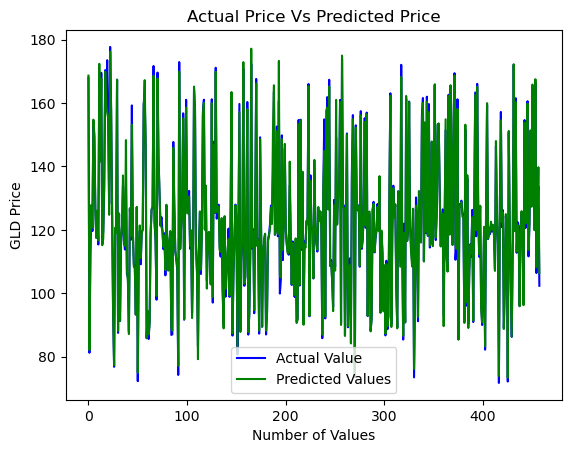

In [115]:
plt.plot(y_test, color='blue',label= "Actual Value")
plt.plot(test_data_prediction, color='green',label="Predicted Values")
plt.title("Actual Price Vs Predicted Price")
plt.ylabel('GLD Price')
plt.xlabel('Number of Values')
plt.legend()
plt.show()

In [117]:
filename = "gold_price_prediction.sav"
pickle.dump(regressor, open(filename, "wb"))

In [119]:
loaded_model = pickle.load(open("gold_price_prediction.sav","rb"))

In [121]:
for column in X.columns:
    print(column)

SPX
USO
SLV
EUR/USD
